<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E8%96%88%E8%90%83%E5%BC%8F%E5%AD%B8%E7%BF%92/emsemble_%E7%9B%B4%E8%A7%80%E7%90%86%E8%A7%A3%E8%96%88%E8%90%83%E5%BC%8F%E5%AD%B8%E7%BF%92%E7%9A%84%E5%84%AA%E5%8B%A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 直觀理解薈萃式學習的優勢使用Matplotlib生成一張圖表，比較單一決策樹與隨機森林（一種薈萃式學習方法）在不同數據集大小下的預測誤差。

In [1]:
%%capture
%pip install wget

In [2]:
#下載檔案
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

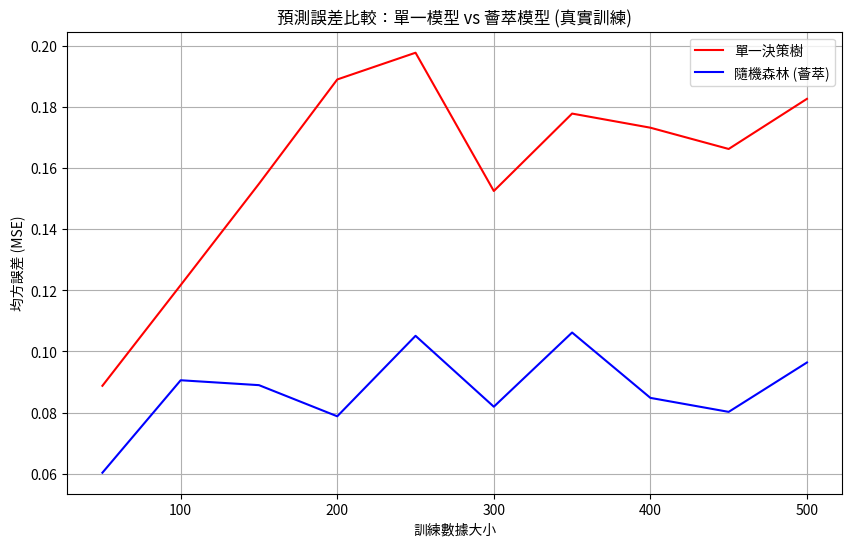

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

# 1. 產生隨機資料集
np.random.seed(42)
data_size = 500  # 總資料量
X = np.random.rand(data_size, 10)  # 10個特徵
y = np.random.rand(data_size)  # 目標變數

# 2. 針對不同訓練資料量，計算模型誤差
training_sizes = np.arange(50, data_size + 1, 50)  # 訓練資料量從 50 到 500，每次增加 50
single_tree_errors = []
random_forest_errors = []

for train_size in training_sizes:
    # 分割資料集
    X_train, X_test, y_train, y_test = train_test_split(
        X[:train_size], y[:train_size], test_size=0.2, random_state=42
    )  # 使用部分資料集作為訓練集

    # 訓練單一決策樹
    single_tree = DecisionTreeRegressor(random_state=42)
    single_tree.fit(X_train, y_train)
    single_tree_pred = single_tree.predict(X_test)
    single_tree_error = mean_squared_error(y_test, single_tree_pred)
    single_tree_errors.append(single_tree_error)

    # 訓練隨機森林 (薈萃模型)
    random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
    random_forest.fit(X_train, y_train)
    random_forest_pred = random_forest.predict(X_test)
    random_forest_error = mean_squared_error(y_test, random_forest_pred)
    random_forest_errors.append(random_forest_error)

# 3. 繪製圖表
plt.figure(figsize=(10, 6))  # 調整圖形大小
plt.plot(training_sizes, single_tree_errors, 'r-', label='單一決策樹')
plt.plot(training_sizes, random_forest_errors, 'b-', label='隨機森林 (薈萃)')
plt.title('預測誤差比較：單一模型 vs 薈萃模型 (真實訓練)')
plt.xlabel('訓練數據大小')
plt.ylabel('均方誤差 (MSE)')  # 使用更精確的誤差指標
plt.grid(True)
plt.legend()

# 4. 儲存圖表
plt.savefig('ensemble_vs_single_model_real_training.png')
plt.show()


⬆︎ 圖表展示了隨著訓練數據量增加，隨機森林的預測誤差低於單一決策樹，突顯了薈萃式學習在提高準確性和穩定性方面的優勢。
- 解釋薈萃式學習如何通過多模型協作降低誤差。